In [13]:
import torch
import torchvision
import torchgadgets as tg
from torchsummary import summary
from run import *
from utils import *

### Run Information

In [14]:
exp_name = "svhn_gan"
run_name = "dcgan_run_4"
epoch = 40

### Data Loading

In [15]:
trainer = Trainer(exp_name, run_name)
load_model_from_checkpoint(exp_name, run_name, trainer.gan, epoch)

Using downloaded and verified file: ./data/svhn/train_32x32.mat


Using downloaded and verified file: ./data/svhn/test_32x32.mat
Model checkpoint was load from: /home/user/denninge/VisionLabSS23/Assignments_7/experiments/svhn_gan/dcgan_run_4/checkpoints/checkpoint_40.pth


### Model Architecture

#### Generator

In [16]:
if trainer.conditional:
    inp = trainer.config['model']['latent_dim']+trainer.config['model']['num_labels']
else:
    inp = trainer.config['model']['latent_dim']
#summary(trainer.gan.generator.cuda(), (1,inp))
trainer.gan.generator

Generator(
  (latent_emb): Sequential(
    (0): Reshape()
    (1): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
  )
  (model): Sequential(
    (0): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (1): ConvTransposeBlock(
      (block): Sequential(
        (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (2): ConvTranspos

#### Discriminator

In [17]:
inp_dim = trainer.config['model']['discriminator']['input_size']
if trainer.conditional:
    inp_dim[0] += trainer.config['model']['num_labels']
#summary(trainer.gan.discriminator.cuda(), tuple(inp_dim))
trainer.gan.discriminator

Discriminator(
  (img_emb): Sequential(
    (0): ConvBlock(
      (block): Sequential(
        (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
        (3): Dropout(p=0.3, inplace=False)
      )
    )
  )
  (model): Sequential(
    (0): ConvBlock(
      (block): Sequential(
        (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
        (3): Dropout(p=0.3, inplace=False)
      )
    )
    (1): ConvBlock(
      (block): Sequential(
        (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
        (3): Dropout(p=0.3

### Generation Samples

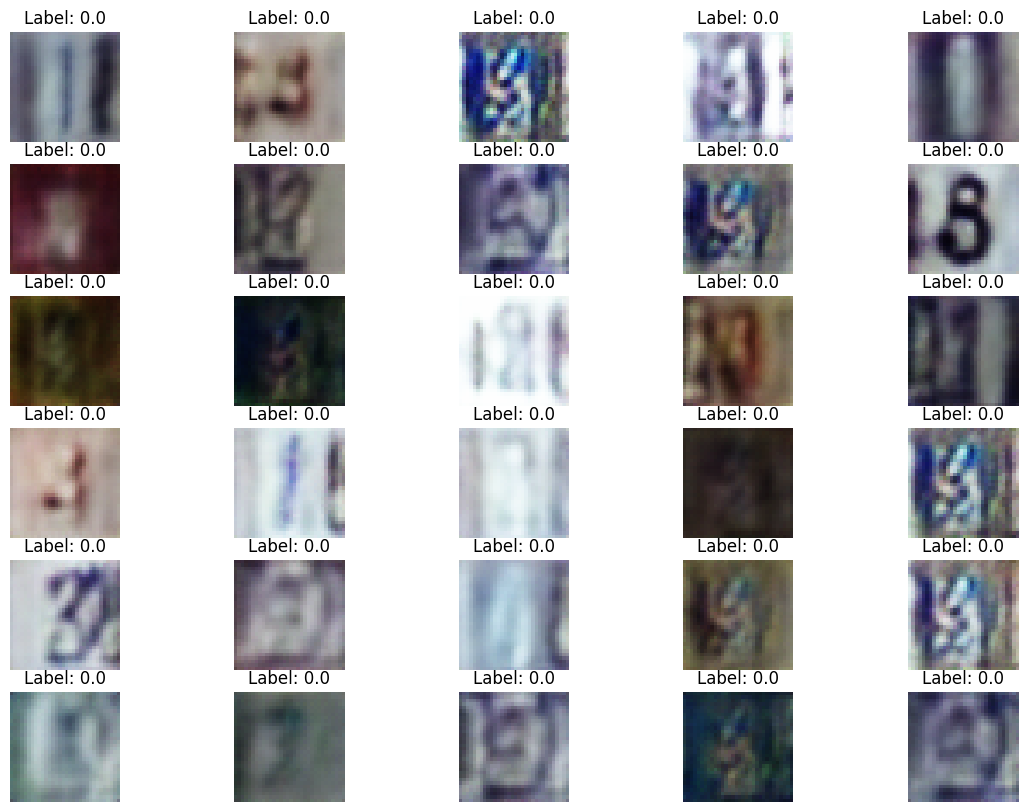

In [18]:

def visualize_imgs(imgs, labels, layout=(6,5)):

    fig, ax = plt.subplots(*layout, figsize=(14,10))
    img_ind = 0
    for x in range(layout[0]):
        for y in range(layout[1]):
            ax[x,y].imshow(imgs[img_ind].permute(1,2,0))
            ax[x,y].axis('off')
            ax[x,y].set_title(f'Label: {labels[img_ind]}')
            img_ind += 1
    return fig

imgs, labels = trainer.generate_samples()
fig = visualize_imgs(imgs, labels)
fig.show()